In [2]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a_0 = sy.Symbol('a_0')
gamma_ij = sy.Symbol('\\gamma_{{ij}}')
h = sy.Symbol('h')
i = sy.Symbol('i')
j = sy.Symbol('j')
k = sy.Symbol('k')
K = sy.Symbol('K')
k_B = sy.Symbol('k_B')
m_e = sy.Symbol('m_e')
N_e = sy.Symbol('N_e')
Ry = sy.Symbol('Ry')
t = sy.Symbol('t')
T = sy.Symbol('T')
T_e = sy.Symbol('T_e')
zeta = sy.Symbol('\\zeta')

C_CE = sy.MatrixSymbol('C^{{(CE)}}', K, K)
C_CD = sy.MatrixSymbol('C^{{(CD)}}', K, K)
C_CE_CD = sy.MatrixSymbol('C^{{(CE/CD)}}', K, K)
E = sy.MatrixSymbol('E', 1, K)
g = sy.MatrixSymbol('g', 1, K)
n = sy.MatrixSymbol('n', K, 1)
Q_tot = sy.MatrixSymbol('Q^{{(tot)}}', K, K)
R_CE_CD = sy.MatrixSymbol('R^{{(CE/CD)}}', K, K)
R_SE = sy.MatrixSymbol('R^{{(SE)}}', K, K)
R_tot = sy.MatrixSymbol('R^{{(tot)}}', K, K)

In [4]:
constants = {
    a_0: 5.2917721090380e-9, # cm
    gamma_ij: 1.0, # 1
    h: 6.58211951440e-16, # eV * s
    k_B: 8.617333262e-5, # eV * K^{-1}
    m_e: 5.68563010362509e-16, # eV * cm^{-2} * s^2
    Ry: 13.60569312299426, # eV
}

In [5]:
levels_12P3P4_13S3S = {
    # 12P3P4
    g[0, 0]: 9,
    E[0, 0]: 0, # eV

    # 13S3S
    g[0, 1]: 3,
    E[0, 1]: 9.511695728174285, # eV

    R_SE[0, 1]: 0,

    # R_SE[1, 0]: 1830,
    R_SE[1, 0]: (
        + (
            + 341000000.0 * (2 * 1 + 1)
            + 203000000.0 * (2 * 1 + 1)
            + 67600000.0 * (2 * 1 + 1)
        )
        / ((2 * 1 + 1) + (2 * 1 + 1) + (2 * 1 + 1))
    )
}
levels_12P3P4_13S3S = {k.subs(K, 2) : v for k, v in levels_12P3P4_13S3S.items()}

In [6]:
zeta_ = 2 * sy.sqrt(sy.pi * Ry) * a_0 * h / (m_e * sy.sqrt(k_B))
sy.Eq(zeta, zeta_)

Eq(\zeta, 2*sqrt(pi)*sqrt(Ry)*a_0*h/(sqrt(k_B)*m_e))

In [7]:
zeta__ = zeta_.subs(constants).n()
sy.Eq(zeta, zeta__)

Eq(\zeta, 8.62913210858377e-6)

In [8]:
C_CE_ = sy.FunctionMatrix(
    K,
    K,
    sy.Lambda(
        (i, j),
        + zeta
        * (T_e**sy.Rational(-1/2))
        * gamma_ij / g[0, i]
        * sy.exp(-(E[0, j] - E[0, i]) / (k_B * T))
    )
)
sy.Eq(sy.Symbol('C^{{(CE)}}_{ij}'), C_CE_.lamda)

Eq(C^{{(CE)}}_{ij}, Lambda((i, j), \gamma_{{ij}}*\zeta*exp((E[0, i] - E[0, j])/(T*k_B))/(sqrt(T_e)*g[0, i])))

In [9]:
C_CD_ = sy.FunctionMatrix(
    K,
    K,
    sy.Lambda(
        (i, j),
        + zeta
        * (T_e**sy.Rational(-1/2))
        * gamma_ij / g[0, i]
    )
)
sy.Eq(sy.Symbol('C^{{(CD)}}_{ij}'), C_CD_.lamda)

Eq(C^{{(CD)}}_{ij}, Lambda((i, j), \gamma_{{ij}}*\zeta/(sqrt(T_e)*g[0, i])))

In [10]:
C_CE_CD_ = sy.FunctionMatrix(
    K,
    K,
    sy.Lambda(
        (i, j),
        sy.Piecewise((C_CD[i, j], i >= j), (C_CE[i, j], i < j))
    )
)
sy.Eq(sy.Symbol('C^{{(CE/CD)}}_{ij}'), C_CE_CD_.lamda)

Eq(C^{{(CE/CD)}}_{ij}, Lambda((i, j), Piecewise((C^{{(CD)}}[i, j], i >= j), (C^{{(CE)}}[i, j], True))))

In [11]:
R_CE_CD_ = sy.FunctionMatrix(
    K,
    K,
    sy.Lambda(
        (i, j),
        C_CE_CD[i, j] * N_e
    )
)
sy.Eq(sy.Symbol('R^{{(CE/CD)}}_{ij}'), R_CE_CD_.lamda)

Eq(R^{{(CE/CD)}}_{ij}, Lambda((i, j), N_e*C^{{(CE/CD)}}[i, j]))

In [12]:
R_tot_ = sy.FunctionMatrix(
    K,
    K,
    sy.Lambda(
        (i, j),
        sy.Piecewise(
            (R_CE_CD[i, j] + R_SE[i, j], (i < j) | (i > j)),
            (0, True),
        )
    )
)
sy.Eq(sy.Symbol('R^{{(tot)}}_{ij}'), R_tot_.lamda)

Eq(R^{{(tot)}}_{ij}, Lambda((i, j), Piecewise((R^{{(CE/CD)}}[i, j] + R^{{(SE)}}[i, j], (i > j) | (i < j)), (0, True))))

In [13]:
(
    R_tot_
        .subs(R_CE_CD, R_CE_CD_)
        .subs(C_CE_CD, C_CE_CD_)
        .subs(C_CE, C_CE_)
        .subs(C_CD, C_CD_)
        .subs(K, 2)
        .doit()
        .as_explicit()
        .subs(constants)
        .subs(zeta, zeta__)
        .subs(levels_12P3P4_13S3S)
        .subs(N_e, 1.0e4)
        .subs(T, 1.0e4)
        .subs(T_e, 1.0e4)
)

Matrix([
[               0, 1.5418458094459e-9],
[203866666.666954,                  0]])

In [14]:
Q_tot_ = sy.FunctionMatrix(
    K,
    K,
    sy.Lambda(
        (i, j),
        sy.Piecewise(
            (
                -sy.Sum(
                    sy.Piecewise(
                        (0, sy.Equality(i, k)),
                        (R_tot[i, k], True),
                    ),
                    (k, 0, K - 1)
                ),
                sy.Equality(i, j)
            ),
            (R_tot[j, i], True),
        )
    )
)
sy.Eq(sy.Symbol('Q^{{(tot)}}_{{i, j}}'), Q_tot_.lamda)

Eq(Q^{{(tot)}}_{{i, j}}, Lambda((i, j), Piecewise((-Sum(Piecewise((0, Eq(i, k)), (R^{{(tot)}}[i, k], True)), (k, 0, K - 1)), Eq(i, j)), (R^{{(tot)}}[j, i], True))))

In [15]:
(lambda K_: sy.Eq(Q_tot.subs(K, K_), Q_tot_.subs(K, K_).as_explicit().doit()))(2)

Eq(Q^{{(tot)}}, Matrix([
[-R^{{(tot)}}[0, 1],  R^{{(tot)}}[1, 0]],
[ R^{{(tot)}}[0, 1], -R^{{(tot)}}[1, 0]]]))

In [16]:
Q_tot__ = (
    Q_tot_
        .subs(R_tot, R_tot_)
        .subs(R_CE_CD, R_CE_CD_)
        .subs(C_CE_CD, C_CE_CD_)
        .subs(C_CE, C_CE_)
        .subs(C_CD, C_CD_)
)
(
    lambda K_:
        sy.Eq(
            Q_tot.subs(K, K_),
            Q_tot__.subs(K, K_).doit().as_explicit()
        )
)(2)

Eq(Q^{{(tot)}}, Matrix([
[-N_e*\gamma_{{ij}}*\zeta*exp((E[0, 0] - E[0, 1])/(T*k_B))/(sqrt(T_e)*g[0, 0]) - R^{{(SE)}}[0, 1],  N_e*\gamma_{{ij}}*\zeta/(sqrt(T_e)*g[0, 1]) + R^{{(SE)}}[1, 0]],
[ N_e*\gamma_{{ij}}*\zeta*exp((E[0, 0] - E[0, 1])/(T*k_B))/(sqrt(T_e)*g[0, 0]) + R^{{(SE)}}[0, 1], -N_e*\gamma_{{ij}}*\zeta/(sqrt(T_e)*g[0, 1]) - R^{{(SE)}}[1, 0]]]))

In [17]:
dn_dt_ = sy.FunctionMatrix(K, 1, sy.Lambda((i, j), sy.Derivative(n[i, 0], t)))
(lambda K_: sy.Eq(n.subs(K, K_), dn_dt_.subs(K, K_).as_explicit()))(2)

Eq(n, Matrix([
[Derivative(n[0, 0], t)],
[Derivative(n[1, 0], t)]]))

In [18]:
(lambda K_: sy.Eq(dn_dt_.subs(K, K_).as_explicit(), (Q_tot__ * n).subs(K, K_).as_explicit()))(2)

Eq(Matrix([
[Derivative(n[0, 0], t)],
[Derivative(n[1, 0], t)]]), Matrix([
[ (N_e*\gamma_{{ij}}*\zeta/(sqrt(T_e)*g[0, 1]) + R^{{(SE)}}[1, 0])*n[1, 0] - (N_e*\gamma_{{ij}}*\zeta*exp((E[0, 0] - E[0, 1])/(T*k_B))/(sqrt(T_e)*g[0, 0]) + R^{{(SE)}}[0, 1])*n[0, 0]],
[-(N_e*\gamma_{{ij}}*\zeta/(sqrt(T_e)*g[0, 1]) + R^{{(SE)}}[1, 0])*n[1, 0] + (N_e*\gamma_{{ij}}*\zeta*exp((E[0, 0] - E[0, 1])/(T*k_B))/(sqrt(T_e)*g[0, 0]) + R^{{(SE)}}[0, 1])*n[0, 0]]]))

In [19]:
sy.Eq(sy.Sum(n[k, 0], (k, 0, K - 1)), 1)

Eq(Sum(n[k, 0], (k, 0, K - 1)), 1)

In [20]:
print('K = 2')
(lambda K_: sy.Eq(n[1, 0].subs(K, K_), sy.solve(sy.Sum(n[k, 0], (k, 0, K - 1)).subs(K, K_).doit() - 1, n[1, 0].subs(K, K_))[0]))(2)

K = 2


Eq(n[1, 0], 1 - n[0, 0])

In [21]:
n_1_ = (
    sy.solve(
        (Q_tot__ * n)
            .subs(K, 2)
            .as_explicit()
            .subs(n[0, 0].subs(K, 2), 1 - n[1, 0].subs(K, 2)),
            n.subs(K, 2)[1, 0]
    )[n[1, 0].subs(K, 2)]
)
n_1__ = (
    n_1_
        .simplify()
        .collect(N_e * zeta)
        .collect(g[0, 0] * g[0, 1])
        .collect(1 / sy.sqrt(T_e))
        .collect(sy.exp(E[0, 1] / (k_B * T)))
)
sy.Eq(
    n[1, 0].subs(K, 2),
    n_1__
)

Eq(n[1, 0], (N_e*sqrt(T_e)*\gamma_{{ij}}*\zeta*exp(E[0, 0]/(T*k_B)) + T_e*exp(E[0, 1]/(T*k_B))*R^{{(SE)}}[0, 1]*g[0, 0])*g[0, 1]/(N_e*sqrt(T_e)*\zeta*(\gamma_{{ij}}*exp(E[0, 0]/(T*k_B))*g[0, 1] + \gamma_{{ij}}*exp(E[0, 1]/(T*k_B))*g[0, 0]) + T_e*(exp(E[0, 1]/(T*k_B))*R^{{(SE)}}[0, 1]*g[0, 0]*g[0, 1] + exp(E[0, 1]/(T*k_B))*R^{{(SE)}}[1, 0]*g[0, 0]*g[0, 1])))

In [22]:
n_1___ = n_1__.subs(zeta, zeta_).subs(constants).subs(levels_12P3P4_13S3S).expand().n()
sy.Eq(n[1, 0], n_1___)

Eq(n[1, 0], 2.58873963257513e-5*N_e*T_e**0.5/(7.7662188977254e-5*N_e*T_e**0.5*exp(110378.645446129/T) + 2.58873963257513e-5*N_e*T_e**0.5 + 5504400000.0*T_e*exp(110378.645446129/T)))

In [37]:
count = int(1e3)
electron_number_densities = np.geomspace(1.0e1, 1.0e30, num=count)

T_ = 1.0e4

n_1____ = [
    n_1___.subs(T_e, T).subs(T, T_).subs(N_e, N_e_)
    for N_e_ in electron_number_densities
]

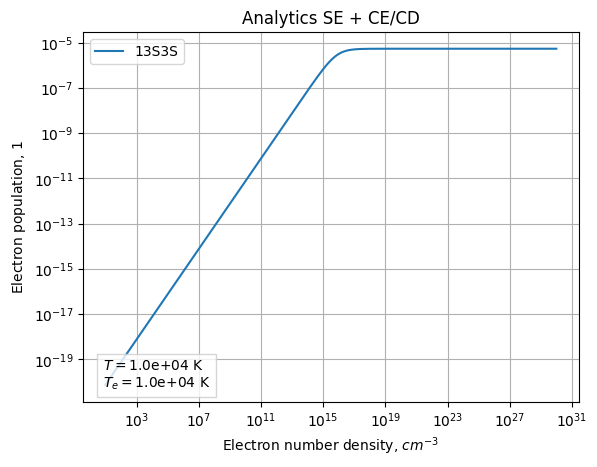

In [24]:
fig, ax = plt.subplots()

plt.plot(electron_number_densities, n_1____, label="13S3S")
plt.title("Analytics SE + CE/CD")
plt.xlabel("Electron number density, $cm^{-3}$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(T_)} K\n"
    f"$T_e = ${'{:.1e}'.format(T_)} K",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.grid()
plt.show()

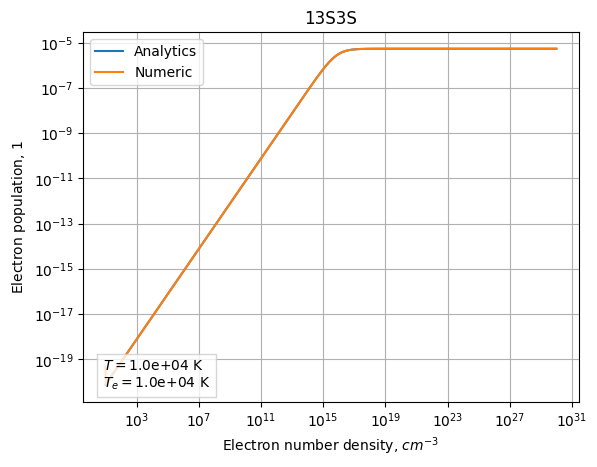

In [46]:
import lss
from utils import *

elements = [
    lss.O1Inasan(),
]
elements[0].keys = ["12P3P4", "13S3S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
population_nlte_1[1] = 8.42538693553854e-16
population_nlte_1[0] = 1.0 - population_nlte_1[1]


delta_time = 1.0e-4

temperatures = np.full(count, T_)
electron_temperatures = temperatures

se = [
    Transition.SE_NIST_O1,
]
ce_balance = [
    Transition.CE_REGEMORTER,
]

populations_nlte = calculate_populations_nlte(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    delta_time=delta_time,
    transitions_types=[
        *se,
        *ce_balance,
    ]
)

fig, ax = plt.subplots()

plt.plot(electron_number_densities, n_1____, label="Analytics")
plt.plot(
    electron_number_densities,
    populations_nlte.T[1],
    label="Numeric",
)
plt.legend()
plt.grid()
plt.title("13S3S")
plt.xlabel("Electron number density, $cm^{-3}$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(temperatures[0])} K\n"
    f"$T_e = ${'{:.1e}'.format(electron_temperatures[0])} K",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.show()

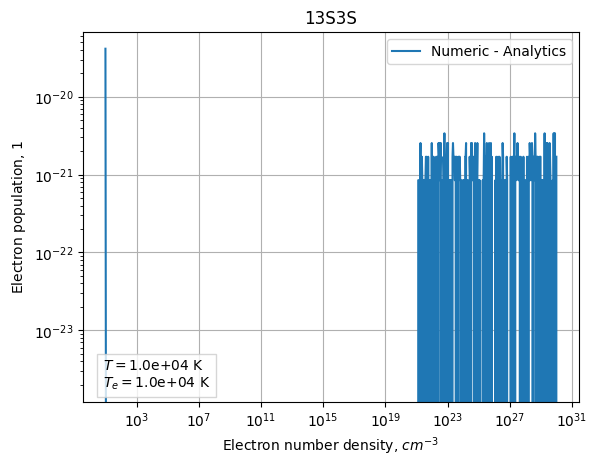

In [47]:
fig, ax = plt.subplots()

plt.plot(
    electron_number_densities,
    populations_nlte.T[1] - n_1____,
    label="Numeric - Analytics",
)
plt.legend()
plt.grid()
plt.title("13S3S")
plt.xlabel("Electron number density, $cm^{-3}$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(temperatures[0])} K\n"
    f"$T_e = ${'{:.1e}'.format(electron_temperatures[0])} K",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.show()

In [51]:
count = int(1e3)
temperatures = np.geomspace(1.0e2, 1.0e5, num=count)

N_es_ = [1.0e3, 1.0e5, 1.0e7, 1.0e9, 1.0e11, 1.0e13]

n_1____ = [
    [
        n_1___.subs(T_e, T).subs(T, T_).subs(N_e, N_e_)
        for T_ in temperatures
    ]
    for N_e_ in N_es_
]

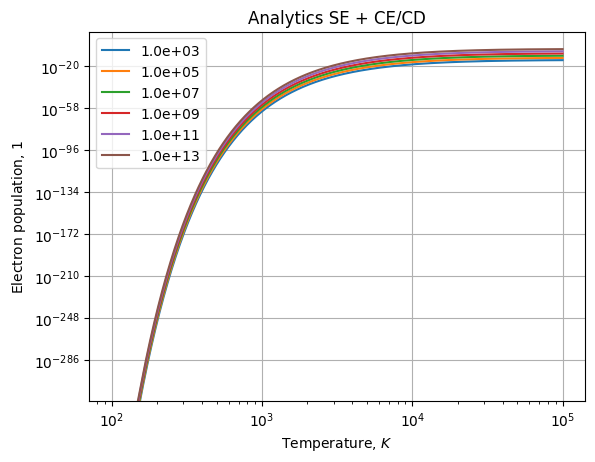

In [53]:
fig, ax = plt.subplots()

for i, n_1 in enumerate(n_1____):
    plt.plot(temperatures, n_1, label=f"{'{:.1e}'.format(N_es_[i])}")
plt.title("Analytics SE + CE/CD")
plt.xlabel("Temperature, $K$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
# plt.text(
#     0.04,
#     0.04,
#     f"$N_e = ${'{:.1e}'.format(N_e_)} $cm^{{-3}}$",
#     transform = ax.transAxes,
#     bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
# )
plt.grid()
plt.show()

In [80]:
n_1____[0][0]

2.01377995849368e-492

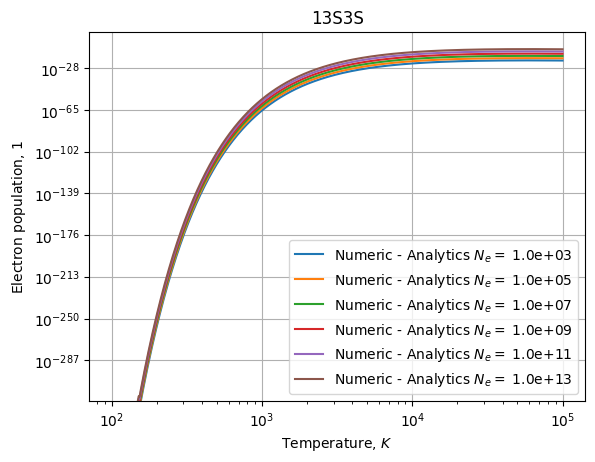

In [94]:
elements = [
    lss.O1Inasan(),
]
elements[0].keys = ["12P3P4", "13S3S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
population_nlte_1[1] = n_1____[0][0]
population_nlte_1[0] = 1.0 - population_nlte_1[1]


delta_time = 1.0e-4

electron_temperatures = temperatures

se = [
    Transition.SE_NIST_O1,
]
ce_balance = [
    Transition.CE_REGEMORTER,
]

populations_nltes = [
    calculate_populations_nlte(
        elements=elements,
        population_nlte_1=population_nlte_1,
        temperatures=temperatures,
        electron_temperatures=electron_temperatures,
        electron_number_densities=np.full(count, N_e_),
        delta_time=delta_time,
        transitions_types=[
            *se,
            *ce_balance,
        ]
    )
    for N_e_ in N_es_
]

fig, ax = plt.subplots()

for i, n_1 in enumerate(n_1____):
    plt.plot(temperatures, n_1, label=f"Analytics $N_e =$ {'{:.1e}'.format(N_es_[i])}")
for i, n in enumerate(populations_nltes):
    plt.plot(
        temperatures,
        n.T[1],
        label=f"Numeric $N_e =$ {'{:.1e}'.format(N_es_[i])}",
    )
plt.legend()
plt.grid()
plt.title("13S3S")
plt.xlabel("Temperature, $K$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.show()